In [49]:
import numpy as np

from keras.models import load_model

import matplotlib.pyplot as plt

from scipy.stats import pearsonr,spearmanr

In [50]:
model = load_model("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/model_11_hg19.hdf5", compile=False)

In [16]:
X = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/chr8_9_summit_centered_test_set_X.npy")

In [ ]:
Ypred = model.predict(X)

In [ ]:
Y = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/chr8_9_summit_centered_test_set_Y_gc.npy")

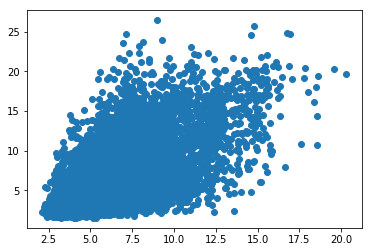

In [10]:
plt.scatter(Ypred,Y)

In [12]:
pearsonr(Ypred,Y)

(array([0.63972272]), array([0.]))

In [13]:
spearmanr(Ypred,Y)

SpearmanrResult(correlation=0.6560647712406029, pvalue=0.0)

In [20]:
def oneHotEncodeSequence(sequence):
    oneHotDimension = (len(sequence), 4)
    dnaAlphabet = {"A":0, "G":1, "C":2, "T":3}
    one_hot_encoded_sequence = np.zeros(oneHotDimension, dtype=np.int)
    for i, nucleotide in enumerate(sequence):
        if nucleotide.upper() in dnaAlphabet:
            index = dnaAlphabet[nucleotide.upper()]
            one_hot_encoded_sequence[i][index] = 1
    return one_hot_encoded_sequence

In [26]:
mysequence = '''gtctcgctgtccacccctgtagtgcagtgagctcggctccctgcggccttgacctcccgggctcaggcaatcctcccgcctcagcccacggagtagatgggaccacaggagcccaccacgcccgactactttttgtaatttttgtagggatggggtctatccatgctgcccaggctggtccgaactgctgggctcaagagctccgcccgcctccgcctcccaaagggcagggatcacaggtgtgagctaccgcgccccgccCAGAGTTTCCGACTGTTAGCAAATCACATTCACCTCAAAACTATTTATACAAGAACTGAAAGGCAAACTAAGTCCGTGCTCCATCACTTCCTGTCCCAGGTCGCGGGGCCGGACATTTTCTCCAAGCGCTTTCCTGGCACAGCGCGCAGGCGGCCTGCGCCAAAGCTCTGGCTTCCTCCAGGCGCCCAGACCCCGCCCTCCCCGCAGGCGCCAGGGCGTTGCCTGGCAACTTAGCTGCGAGGGGATTGGCTGCGCGGGACCCCGTGACCATCCCGGAGACCACGCATTTCCTGCGCCCCCGGAAGTGGTGATAATGCCAGGCCCTGCCCCCGGCAGAGGCGGAAGCGGAGTCGGCCTGAGAGGTCTCTCGTCGCTGCAGGCGCCTCAGCCCAGCCGCGTGCCTTGGCCCATGGCCGCCTACTCTTACCGCCCCGGCCCTGGGGCCGGCCCTGGGCCTGCTGCAGGCGCGGCGCTGCCGGACCAGAGCTTCCTGTGGAACGTTTTCCAGAGGTGCGGCCTGGCACCGCCCGGGCACCTCCCGCCTCCGCCGCGGCGGCCCCGACCCCTGTCCCGACTCCCCCGACCAACCCCGTTCCCTGCCGGTTCTACTGCGGCCTCCTCCGTCCCCTGTCGGGTCCCCCGCGGCCCCCTCCCGTCCCCTGCCGCCGCCCCCGACCCCTGCCCCAGCCGACGCGGCCGCCCCCGTCCCCTGGCGGGTCCCCCGCGGTCTCCCCCGTCC'''

In [27]:
len(mysequence)

1000

In [30]:
peiransequence = '''TCTCGCTGTCCACCCCTGTAGTGCAGTGAGCTCGGCTCCCTGCGGCCTTGACCTCCCGGGCTCAGGCAATCCTCCCGCCTCAGCCCACGGAGTAGATGGGACCACAGGAGCCCACCACGCCCGACTACTTTTTGTAATTTTTGTAGGGATGGGGTCTATCCATGCTGCCCAGGCTGGTCCGAACTGCTGGGCTCAAGAGCTCCGCCCGCCTCCGCCTCCCAAAGGGCAGGGATCACAGGTGTGAGCTACCGCGCCCCGCCCAGAGTTTCCGACTGTTAGCAAATCACATTCACCTCAAAACTATTTATACAAGAACTGAAAGGCAAACTAAGTCCGTGCTCCATCACTTCCTGTCCCAGGTCGCGGGGCCGGACATTTTCTCCAAGCGCTTTCCTGGCACAGCGCGCAGGCGGCCTGCGCCAAAGCTCTGGCTTCCTCCAGGCGCCCAGACCCCGCCCTCCCCGCAGGCGCCAGGGCGTTGCCTGGCAACTTAGCTGCGAGGGGATTGGCTGCGCGGGACCCCGTGACCATCCCGGAGACCACGCATTTCCTGCGCCCCCGGAAGTGGTGATAATGCCAGGCCCTGCCCCCGGCAGAGGCGGAAGCGGAGTCGGCCTGAGAGGTCTCTCGTCGCTGCAGGCGCCTCAGCCCAGCCGCGTGCCTTGGCCCATGGCCGCCTACTCTTACCGCCCCGGCCCTGGGGCCGGCCCTGGGCCTGCTGCAGGCGCGGCGCTGCCGGACCAGAGCTTCCTGTGGAACGTTTTCCAGAGGTGCGGCCTGGCACCGCCCGGGCACCTCCCGCCTCCGCCGCGGCGGCCCCGACCCCTGTCCCGACTCCCCCGACCAACCCCGTTCCCTGCCGGTTCTACTGCGGCCTCCTCCGTCCCCTGTCGGGTCCCCCGCGGCCCCCTCCCGTCCCCTGCCGCCGCCCCCGACCCCTGCCCCAGCCGACGCGGCCGCCCCCGTCCCCTGGCGGGTCCCCCGCGGTCTCCCCCGTCCG'''

In [28]:
myOneHotEncodedSequence = oneHotEncodeSequence(mysequence)

In [32]:
peiranOneHotEncodedSequence = oneHotEncodeSequence(peiransequence)

In [33]:
sequences = np.stack([myOneHotEncodedSequence,
                      peiranOneHotEncodedSequence
                     ])

In [34]:
sequences.shape

(2, 1000, 4)

In [43]:
myseqPred = model.predict(sequences)

In [44]:
myseqPred

array([[14.261482],
       [14.134691]], dtype=float32)